In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [2]:
import matplotlib.pyplot as plt

## MNIST Hand-written digits

Load the dataset of 28x28 grayscale images containing hand-written digits. We will attempt to classify the images into digits 0-9.

In [3]:
(training_images, training_labels) ,  (test_images, test_labels) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [4]:
training_images = training_images/255.0
test_images = test_images/255.0

In [5]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [6]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.1853
Epoch 2/10
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0746
Epoch 3/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0499
Epoch 4/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0333
Epoch 5/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0255s - l - ETA:
Epoch 6/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0224
Epoch 7/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0177s - loss: 0.015
Epoch 8/10
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0140
Epoch 9/10
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0138
Epoch 10/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0122s - loss: 0.0


In [8]:
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/sample - loss: 0.0932


0.09317189952743765

In [9]:
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

[1.6232214e-16 3.1070614e-17 1.0210962e-17 1.9017312e-12 9.7227152e-20
 4.6093137e-17 2.1948769e-21 1.0000000e+00 1.2902845e-17 4.1746359e-12]
7


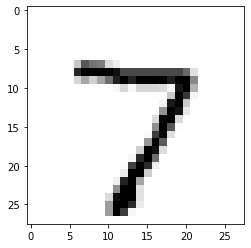

In [14]:
plt.imshow(test_images[0], cmap='Greys')

In [44]:
test_images[0].shape

(28, 28)

The first few are all correctly labeled by the model.

[7 2 1 0 4 1 4 9 5 9]


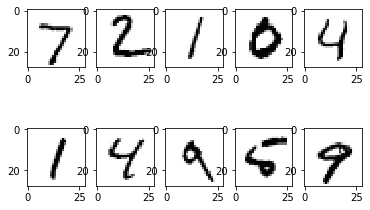

In [32]:
fig, axs = plt.subplots(ncols=5, nrows=2)

for i in range(2):
    for j in range(5):
        axs[i, j].imshow(test_images[i*5+j], cmap='Greys')

print(np.argmax(classifications[0:10], axis=1))

## Let's look at a few misclassified examples

In [33]:
pred = np.argmax(classifications, axis=1)

In [36]:
sum(pred != test_labels)

186

In [41]:
errs = [i for i, (p,y) in enumerate(zip(pred,test_labels)) if p!=y]

[2 3 7 0 5 2 2 4 8 3]
[4 5 3 6 3 8 8 8 5 1]


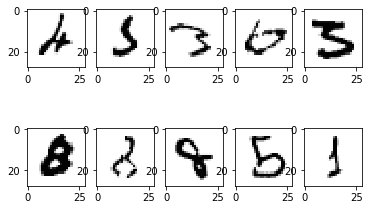

In [43]:
fig, axs = plt.subplots(ncols=5, nrows=2)

for i in range(2):
    for j in range(5):
        axs[i, j].imshow(test_images[errs[i*5+j]], cmap='Greys')

print(np.argmax(classifications[errs[0:10]], axis=1))
print(test_labels[errs[0:10]])

In [55]:
from sklearn.metrics import confusion_matrix
from itertools import product

In [56]:
cnf_matrix = confusion_matrix(test_labels, pred)

In [57]:
log_cnf_matrix = np.log(cnf_matrix, where=(cnf_matrix > 0))

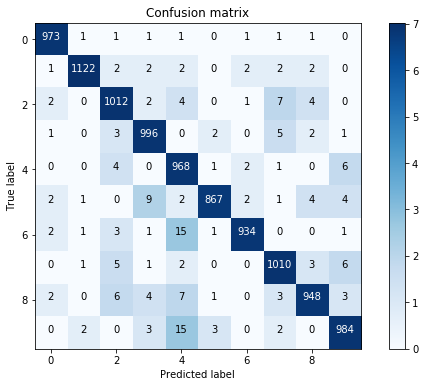

In [59]:
plt.figure(figsize=(10,6))
plt.imshow(log_cnf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.gca().grid(False)
plt.title("Confusion matrix")
plt.colorbar()
plt.ylabel("True label")
plt.xlabel("Predicted label")

thresh = cnf_matrix.max() / 2
for i, j in product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
    plt.text(j, i, format(cnf_matrix[i, j], "d"),
             horizontalalignment="center",
             color="white" if cnf_matrix[i, j] > thresh else "black")